**Problem Statement**

Image Classification - Solve the following Binary Classification Problem - Concrete Crack
Images for Classification

**Expected Output**

The Final Model will be able to classify the concrete wall images into whether it has crack or not.Accuracy of the model.

**About Dataset**

The dataset contains two class of images,one class if of concrete wall with crack and another class without crack.These two classes is seperated into two folders "Positive" and "Negative".Each class contains 20000 images,total data set contains 40000.Each image is of 227 x 227 pixels with RGB channels.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Methodology**

We will be building CNN with 4 Convolutional Layer model to classify images using keras framework.
We first read images and then resize to 100 X 100 from 227 X 227 to faten the training process.We stored the resized images so that we no need reprocess the images to begin later.We just load the processed images.
We divided our 70%(14000 Positive and 14000 Negative) of data set for training and 30%(6000 Positive and 6000 Negative) of dataset for testing.Then assigned labels 1 to positive images and 0 to negative images.Then shuffle the training set.Then Partitioned input and outputs of Training and Testing which will be used for training and testing model.In the model we implemented 10 epocs with batch size of 128,compiled with binary_crossentropy loss function and adam optimizer.Compared value accuracy with test accuracy.


In [3]:
import pandas as pd
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
!pip install visualkeras
import visualkeras
from PIL import ImageFont
import tensorflow as tf

from glob import glob
from google.colab import drive
drive.mount('/content/drive/')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 14.0 MB/s eta 0:00:00
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
path = "/content/drive/MyDrive/IMPRO/Data"

pos_images = glob(f"{path}/Positive/*.jpg");
pos_labels = [1] * len(pos_images)
neg_images =  glob(f"{path}/Negative/*.jpg");
neg_labels = [0] * len(neg_images)

print(len(pos_images))


975


In [5]:
pos_image_list = []
for i in pos_images:
    image = cv2.imread(i)
    image_resize = cv2.resize(image, (100, 100))
    pos_image_list.append(image_resize)

pos_image_resized = np.array(pos_image_list)

neg_image_list = []
for i in neg_images:
    image = cv2.imread(i)
    image_resize = cv2.resize(image,(100,100))
    neg_image_list.append(image_resize)

neg_image_resized = np.array(neg_image_list)


In [6]:
np.save("positive_resize",pos_image_resized)
np.save("negative_resize",neg_image_resized)

In [7]:
pos_resized = np.load("positive_resize.npy")
neg_resized = np.load("negative_resize.npy")

In [8]:


final_train = []
for i in pos_resized[0:200]:
    final_train.append([i,1])

for j in neg_resized[0:200]:
    final_train.append([j,0])
# pos_train = pos_resized[0:15000]
# pos_label_train = [1]*len(pos_train)

# neg_train = neg_resized[0:15000]
# neg_label_train = [0]*len(neg_train)


In [9]:
len(final_train)

400

In [10]:
from sklearn.utils import shuffle

final_train = np.array(final_train,dtype=object)
final_train = shuffle(final_train)
images_train = []
labels_train = []

for i in final_train:
    images_train.append(i[0])
    labels_train.append(i[1])

In [11]:
# final_valid = []
# for i in pos_resized[15000:19000]:
#     final_valid.append([i,1])

# for j in neg_resized[15000:19000]:
#     final_valid.append([j,0])



final_test = []

for i in pos_resized[200:300]:
    final_test.append([i,1])

for j in neg_resized[200:300]:
    final_test.append([j,0])

final_test = np.array(final_test,dtype=object)
final_test = shuffle(final_test)
images_test = []
labels_test = []

for i in final_test:
    images_test.append(i[0])
    labels_test.append(i[1])

# pos_valid_test = pos_resized[15000:19000]
# pos_label_valid = [1]*len(pos_valid_test)
# neg_valid_test = neg_resized[15000:19000]
# neg_label_valid = [0]*len(neg_valid_test)
print(len(images_test))


200


## Model 1-CNN with 4 convolution layers

In [12]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow.keras.utils import img_to_array, load_img

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [15]:
print(len(images_train),len(labels_train))
print(len(images_test),len(labels_test))

images_train = np.array(images_train)
labels_train = np.array(labels_train)


images_test = np.array(images_test)
labels_test = np.array(labels_test)

400 400
200 200


In [16]:
model_history = model.fit(images_train, labels_train, validation_data = (images_test, labels_test), epochs = 10, batch_size=128)

Epoch 1/10
4/4 [==============================] - 23s 5s/step - loss: 35.9396 - accuracy: 0.4775 - val_loss: 9.1369 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 17s 4s/step - loss: 6.6837 - accuracy: 0.5350 - val_loss: 1.0436 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 11s 3s/step - loss: 1.8462 - accuracy: 0.5200 - val_loss: 0.5796 - val_accuracy: 0.6050
Epoch 4/10
4/4 [==============================] - 10s 2s/step - loss: 0.9903 - accuracy: 0.5425 - val_loss: 0.5627 - val_accuracy: 0.6300
Epoch 5/10
4/4 [==============================] - 11s 3s/step - loss: 0.6333 - accuracy: 0.6525 - val_loss: 0.3917 - val_accuracy: 0.9750
Epoch 6/10
4/4 [==============================] - 12s 3s/step - loss: 0.3596 - accuracy: 0.8750 - val_loss: 0.2339 - val_accuracy: 0.9600
Epoch 7/10
4/4 [==============================] - 10s 2s/step - loss: 0.3137 - accuracy: 0.8750 - val_loss: 0.3687 - val_accuracy: 0.7900
Epoch 8/10
4/4 [=================

In [17]:
from sklearn.metrics import accuracy_score

# final_test = np.concatenate((pos_test,neg_test),axis=0)
# final_label_test = np.concatenate((pos_label_test,neg_label_test),axis=0)

prediction = model.predict(images_test)
k=(prediction >= 0.5).astype(np.int)
print("Accuracy_Score : {}".format(accuracy_score(k, labels_test) * 100))

7/7 [==============================] - 1s 153ms/step
Accuracy_Score : 56.49999999999999


<ipython-input-17-aada971e43f5>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  k=(prediction >= 0.5).astype(np.int)


In [18]:
prediction

array([[0.9740621 ],
       [0.52615964],
       [0.99582285],
       [0.50156724],
       [0.9954124 ],
       [0.5650998 ],
       [0.9545605 ],
       [0.9987483 ],
       [0.9987057 ],
       [0.99964255],
       [0.6771762 ],
       [0.9877975 ],
       [0.6106289 ],
       [0.4889546 ],
       [0.8913581 ],
       [0.5275088 ],
       [0.517923  ],
       [0.99996793],
       [0.5800075 ],
       [0.53145313],
       [0.5240691 ],
       [0.72583926],
       [0.96456367],
       [0.9402063 ],
       [0.9805833 ],
       [0.5045124 ],
       [0.5084021 ],
       [0.99954814],
       [0.53304815],
       [0.49462417],
       [0.6848895 ],
       [0.985035  ],
       [0.99385905],
       [0.9922594 ],
       [0.5616664 ],
       [0.9932219 ],
       [0.9721321 ],
       [0.51434416],
       [0.99707925],
       [0.5446821 ],
       [0.49831128],
       [0.9937502 ],
       [0.5097045 ],
       [0.9979071 ],
       [0.99603444],
       [0.9981598 ],
       [0.6774471 ],
       [0.984

In [19]:
k=(prediction >= 0.5).astype(np.int)

<ipython-input-19-786ba72674d7>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  k=(prediction >= 0.5).astype(np.int)


In [20]:
from sklearn.metrics import accuracy_score

# final_test = np.concatenate((pos_test,neg_test),axis=0)
# final_label_test = np.concatenate((pos_label_test,neg_label_test),axis=0)

prediction = model.predict(images_test)
print("Accuracy_Score : {}".format(accuracy_score(k, labels_test) * 100))

7/7 [==============================] - 1s 156ms/step
Accuracy_Score : 56.49999999999999


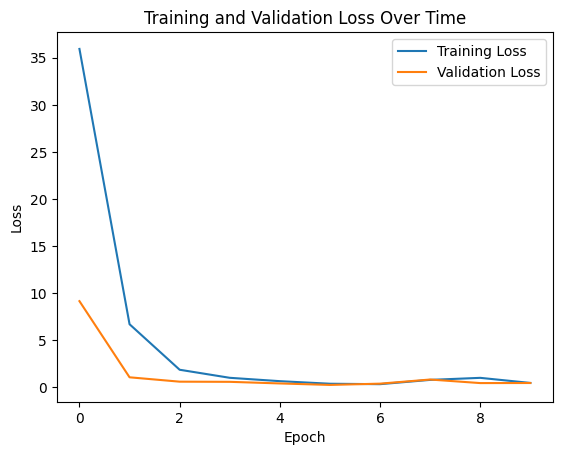

In [21]:
import matplotlib.pyplot as plt

# Membuat plot untuk training loss
plt.plot(model_history.history['loss'], label='Training Loss')

# Membuat plot untuk validation loss
plt.plot(model_history.history['val_loss'], label='Validation Loss')

# Memberi label pada sumbu x dan y serta judul plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

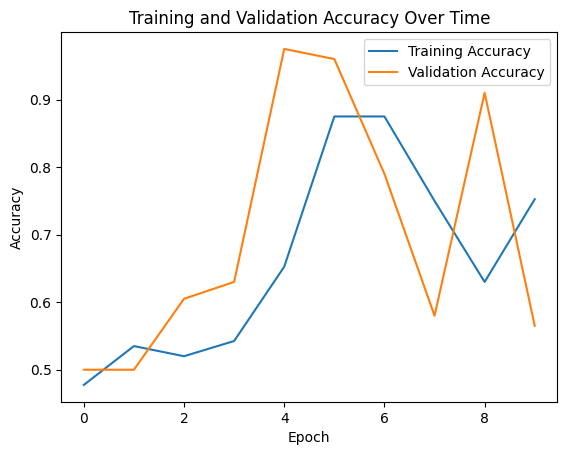

In [22]:
import matplotlib.pyplot as plt

# Membuat plot untuk training accuracy
plt.plot(model_history.history['accuracy'], label='Training Accuracy')

# Membuat plot untuk validation accuracy
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')

# Memberi label pada sumbu x dan y serta judul plot
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Time')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [23]:
results = model.evaluate(images_test, labels_test, batch_size=128)
print("test loss, test acc:", results)

2/2 [==============================] - 1s 427ms/step - loss: 0.4373 - accuracy: 0.5650
test loss, test acc: [0.4373449981212616, 0.5649999976158142]


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
def evaluate_model(model, images_test,labels_test):

    results = model.evaluate(images_test,labels_test, verbose=0)
    loss = results[0]
    acc = results[1]

    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))

    y_pred = np.squeeze((model.predict(images_test) >= 0.5).astype(np.int))
    cm = confusion_matrix(labels_test, y_pred)
    clr = classification_report(labels_test, y_pred, target_names=["NEGATIVE", "POSITIVE"])

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("Classification Report:\n----------------------\n", clr)

    Test Loss: 0.43734
Test Accuracy: 56.50%
7/7 [==============================] - 2s 283ms/step


<ipython-input-24-04cde486f314>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.squeeze((model.predict(images_test) >= 0.5).astype(np.int))


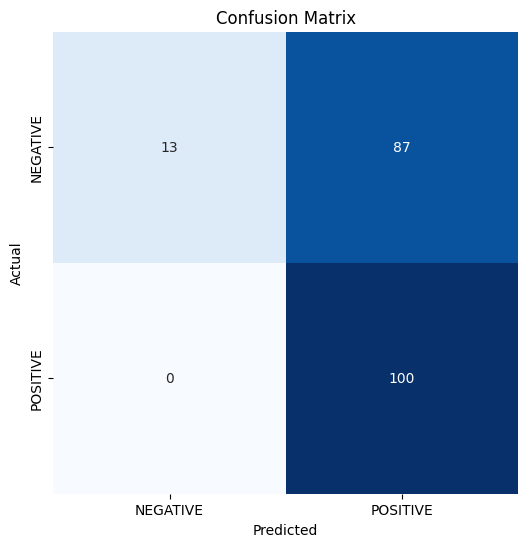

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       1.00      0.13      0.23       100
    POSITIVE       0.53      1.00      0.70       100

    accuracy                           0.56       200
   macro avg       0.77      0.56      0.46       200
weighted avg       0.77      0.56      0.46       200



In [25]:
evaluate_model(model,images_test,labels_test )

# Model 2-CNN with 2 convolution layers

In [26]:
import keras
inputs = keras.Input(shape=(100, 100, 3))
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model2 = keras.Model(inputs=inputs, outputs=outputs)

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model2.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 32)               0     

In [27]:
model2_history = model2.fit(images_train, labels_train, validation_data = (images_test, labels_test), epochs = 10, batch_size=128)

Epoch 1/10
4/4 [==============================] - 5s 880ms/step - loss: 7.5562 - accuracy: 0.5150 - val_loss: 1.6536 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 4s 857ms/step - loss: 5.7042 - accuracy: 0.4900 - val_loss: 2.7272 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 6s 1s/step - loss: 3.4041 - accuracy: 0.4850 - val_loss: 4.0755 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 4s 877ms/step - loss: 2.5543 - accuracy: 0.5150 - val_loss: 1.3487 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 4s 875ms/step - loss: 0.9105 - accuracy: 0.6125 - val_loss: 0.4133 - val_accuracy: 0.7950
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 0.5879 - accuracy: 0.7550 - val_loss: 0.3933 - val_accuracy: 0.7500
Epoch 7/10
4/4 [==============================] - 4s 810ms/step - loss: 0.5027 - accuracy: 0.6925 - val_loss: 0.2670 - val_accuracy: 0.9300
Epoch 8/10
4/4 [==========

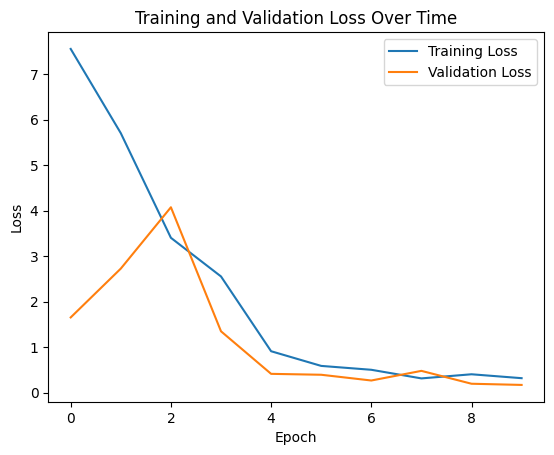

In [28]:
import matplotlib.pyplot as plt

# Membuat plot untuk training dan validation loss
plt.plot(model2_history.history['loss'], label='Training Loss')
plt.plot(model2_history.history['val_loss'], label='Validation Loss')

# Memberi label pada sumbu x dan y serta judul plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [29]:
results = model2.evaluate(images_test, labels_test, batch_size=128)
print("test loss, test acc:", results)

2/2 [==============================] - 1s 324ms/step - loss: 0.1699 - accuracy: 0.9800
test loss, test acc: [0.16986247897148132, 0.9800000190734863]


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
def evaluate_model(model, images_test,labels_test):

    results = model2.evaluate(images_test,labels_test, verbose=0)
    loss = results[0]
    acc = results[1]

    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))

    y_pred = np.squeeze((model2.predict(images_test) >= 0.5).astype(np.int))
    cm = confusion_matrix(labels_test, y_pred)
    clr = classification_report(labels_test, y_pred, target_names=["NEGATIVE", "POSITIVE"])

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("Classification Report:\n----------------------\n", clr)

    Test Loss: 0.16986
Test Accuracy: 98.00%
7/7 [==============================] - 1s 64ms/step


<ipython-input-30-8d941afc3560>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.squeeze((model2.predict(images_test) >= 0.5).astype(np.int))


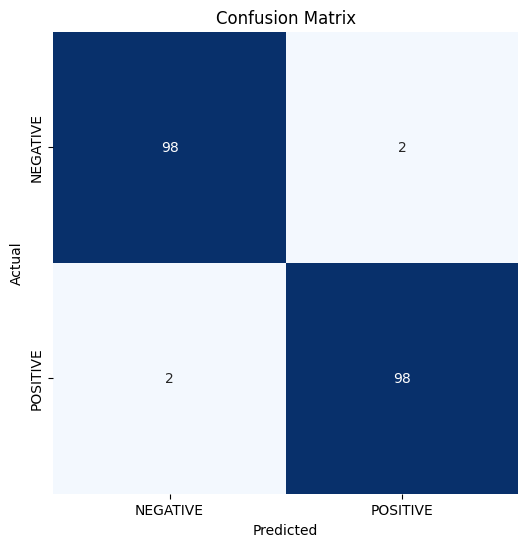

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.98      0.98      0.98       100
    POSITIVE       0.98      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [31]:
evaluate_model(model2,images_test,labels_test )